In [103]:

from scipy import stats

import matplotlib.pyplot as plt
import numpy as np

import numpy.random as rd

import pandas as pd 

from tqdm import tqdm
import math

In [104]:
_max  =1000

In [105]:
mu = 10
sigma = 1

In [106]:
def h(x):
    global mu
    global sigma
    
    return (x-mu)**2/(2 * sigma)

def delta_h(x):
    global mu
    global sigma
    return  x/sigma - mu/sigma

In [107]:
L =100
def leap_flog_step1(r, eta,x):
    return r - 0.5*eta* delta_h(x)

def leap_flog_step2(r, x, eta):
    return x + eta * r

def Leapfrog(x,r, eta):
    for _ in range(L):
        r = leap_flog_step1(r, eta,x)
        x = leap_flog_step2(r, x, eta)
        r = leap_flog_step1(r, eta,x)
    return x,r

In [108]:
def momentum(r):
    return 0.5 * r**2

In [109]:
def hamiltonian(x,r):
    return -h(x) - momentum(r)

In [110]:
   
def BuildTree(x,r,u,v,j,eta):    
    if j == 0:
        x_dash,r = Leapfrog(x,r,v*eta)
        n = 1 if u < np.exp(-hamiltonian(x_dash,r)) else 0
        s = 1 if np.exp( - hamiltonian(x_dash,r)) > np.log(u)-_max else 0
        return x_dash,r,x_dash,r,x_dash,n,s
    else:
        x_minus,r_minus, x_plus,r_plus,x_dash,n,s = BuildTree(x,r,u,v,j-1,eta)    
        if s == 1: 
            if v == -1:
                x_minus,r_minus, _,_,x_dash, n_dash,s_dash = BuildTree(x_minus,r_minus,u,v,j-1,eta)
            elif v == 1:
                _,_, x_plus,r_plus,x_dash, n_dash,s_dash = BuildTree(x_plus,r_plus,u,v,j-1,eta)
            else:
                print("Error")
            x = x_dash if n_dash/(n_dash + n) > rd.uniform() else x
            s = s_dash* (1 if (x_plus-x_minus)*r_minus >= 0 else 0) * (1 if (x_plus-x_minus)*r_plus >= 0 else 0)
            n = n + n_dash
        return x_minus,r_minus,x_plus,r_plus,x, n,s
                
                           

In [119]:
M =3000
x = 3
eta = 0.01
result = []
for _ in range(0,M):
    p = rd.normal(loc=0,scale=1)
    u = rd.uniform(0.0, np.exp(- hamiltonian(x,p)))
    x_minus,x_plus = x,x
    r_minus,r_plus = p,p
    j = 0
    n=1
    s =1    
    while s == 1:
        v = rd.choice([-1,1])
        if v == -1:
            x_minus,r_minus, _,_, x_dash,n_dash,s_dash = BuildTree(x_minus,r_minus,u,v,j,eta)
        elif v == 1:
            _,_, x_plus,r_plus,x_dash,n_dash,s_dash = BuildTree(x_plus,r_plus,u,v,j,eta)
        else:
            print("error")
        if s_dash ==1:
            x = x_dash if n_dash/n > rd.uniform() else x
        else:
            print("not accepeted")
        n = n + n_dash
        s = s_dash * (1 if (x_plus-x_minus)*r_minus >= 0 else 0) * (1 if (x_plus-x_minus)*r_plus >= 0 else 0)
        j = j +1
    result.append(x)
    


not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not ac

not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not accepeted
not ac

(array([  18.,   83.,  194.,  449.,  642.,  649.,  405.,  198.,   51.,   11.]),
 array([  6.92716624,   7.54195472,   8.1567432 ,   8.77153168,
          9.38632016,  10.00110864,  10.61589712,  11.2306856 ,
         11.84547408,  12.46026255,  13.07505103]),
 <a list of 10 Patch objects>)

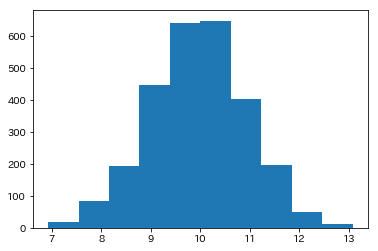

In [120]:
plt.hist(np.array(result[300:]))